# Additional Visualizations

## General SOTA DP-Performance Graph
Display performance of non-adapted SOTA models under DP, compared to their performance without DP.

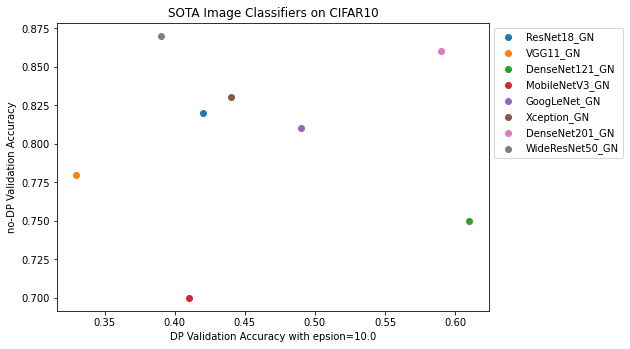

In [71]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# TODO: Check if all trained on same conditions.

# enter different sota model performances manually
dp_performances = np.array([0.42, 0.33, 0.61, 0.41, 0.49, 0.44, 0.59, 0.39])
nodp_performances = np.array([0.82, 0.78, 0.75, 0.70, 0.81, 0.83, 0.86, 0.87])
model_names = np.array(["ResNet18_GN", "VGG11_GN", "DenseNet121_GN", "MobileNetV3_GN", 
                "GoogLeNet_GN", "Xception_GN", "DenseNet201_GN", "WideResNet50_GN"])
model_sizes = np.array([11.2, 128.0, 8.0, 4.2, 5.6, 20.8, 18.1, 18.1])

fig = plt.figure()

# Plot Nr. 1 - Scatter Plot DP/no-DP SOTA performances
axis1 = fig.add_axes([0, 0, 1, 1])

for i in range(len(dp_performances)): 
    axis1.scatter(dp_performances[i], nodp_performances[i], label=model_names[i])

axis1.legend(bbox_to_anchor=(1,1),loc="upper left")
axis1.set_xlabel("DP Validation Accuracy with epsion=10.0")
axis1.set_ylabel("no-DP Validation Accuracy")
axis1.set_title("SOTA Image Classifiers on CIFAR10")
plt.show()
#plt.scatter(dp_performances, nodp_performances, c='g')


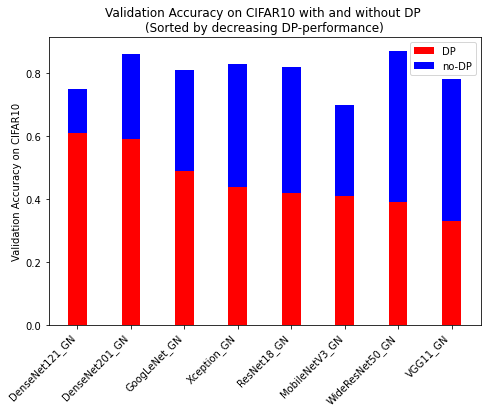

In [85]:
# Plot Nr. 2 - Bar Plot DP/no-DP SOTA performances

# order based on decreasing DP performance
# on negative dp_performances bs argsort works only increasing order
# negating array inverts this order (highest is lowest)
dec_dp_perf_indices = (-dp_performances).argsort()
# apply order
new_nodp_perfomances = nodp_performances[dec_dp_perf_indices]
new_dp_performances = dp_performances[dec_dp_perf_indices]
new_model_names = model_names[dec_dp_perf_indices]
# calculate difference for plot
diff_nodp_dp = new_nodp_perfomances-new_dp_performances

width = 0.35
fig = plt.figure()
axis2 = fig.add_axes([0,0,1,1])
axis2.bar(new_model_names, new_dp_performances, width, color='r')
axis2.bar(new_model_names, diff_nodp_dp, width, bottom=new_dp_performances, color='b')
axis2.set_ylabel('Validation Accuracy on CIFAR10')
axis2.set_title('Validation Accuracy on CIFAR10 with and without DP \n(Sorted by decreasing DP-performance)')
plt.xticks(rotation=45, ha="right")
# axis2.set_xticks(model_names, ('G1', 'G2', 'G3', 'G4', 'G5'))
# axis2.set_yticks(np.arange(0, 81, 10))
axis2.legend(labels=['DP', 'no-DP'])
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

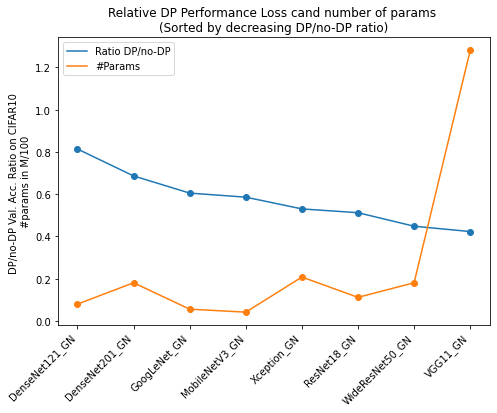

In [86]:
# TODO: we could also think about plotting the relation to the #params for each 
# architecture type separately (e.g. ResNet18, ResNet50, ResNet152, etc.)

ratio_nodp_dp = dp_performances/nodp_performances
dec_dp_ratio_indices = (-ratio_nodp_dp).argsort()
# apply order
ratio_nodp_dp = ratio_nodp_dp[dec_dp_ratio_indices]
new_model_names = model_names[dec_dp_ratio_indices]
new_model_sizes = model_sizes[dec_dp_ratio_indices]

width = 0.35
fig = plt.figure()
axis2 = fig.add_axes([0,0,1,1])

axis2.scatter(new_model_names, ratio_nodp_dp)
axis2.plot(new_model_names, ratio_nodp_dp, label="Ratio DP/no-DP")

axis2.scatter(new_model_names, new_model_sizes/100)
axis2.plot(new_model_names, new_model_sizes/100, label="#Params")

axis2.set_ylabel('DP/no-DP Val. Acc. Ratio on CIFAR10 \n#params in M/100')
axis2.set_title('Relative DP Performance Loss and number of params \n(Sorted by decreasing DP/no-DP ratio)')

plt.legend()
plt.xticks(rotation=45, ha="right")

## Gradient Graphs
Could be used to reveil more information about the GGN with and without DP for different SOTA models.<br>
Easy variant compared to following section. 

In [ ]:
# Figure 1 - GGN Value DP and non-DP as part of it, ordered by highest DP gradient magnitude (#params normalized or not)
# same as figure 2 above

In [ ]:
# Figure 2 - GGN DP/-no-DP Scale Factor (normalized by #params) and ordered by highest scale factor
# same as figure 3 above -- comparison with #params (normalized and non-normalized variant)

## Advanced Smoothness Plots
Based on the visual, qualitative smoothness evaluation of the loss landscape in the NIPS paper "How Does Batch Normalization Help Optimization?" by Santurkar et al., NIPS 2018. 

In [ ]:
# Figure 1 - Loss Landscape


In [ ]:
# Figure 2 - Gradient Predictiveness


In [ ]:
# Figure 3 - Effective Beta-Smoothness